<a href="https://colab.research.google.com/github/KeertanPatro/Unsupervised/blob/main/Netflix_Movies_and_TV_shows_clustering_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -** Konapala Sai Keertan Patro


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from wordcloud import WordCloud, STOPWORDS

In [ ]:
plt.style.use('ggplot')

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Netflix_clustering_unsupervised/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<Axes: >

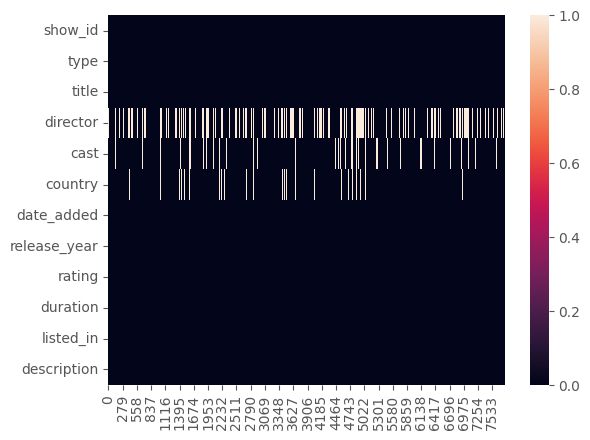

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isna().transpose())

### What did you know about your dataset?

*  There are 7787 observations and 12 columns.  
* There are some missing values found in column director,cast and country.  
* There are no duplicate values present in thid dataset.  
* The datatype of the most features are object.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,2863,1608,334,3


### Variables Description

**Show_id:** unique id foe each movie.  
**type:**    identifier(movie/TV show).   
**Title:**   Title of the movie/show.   
**director:**  Director of the show.   
**cast:**  actors involved.      
**country:**  Country of the  production.  
**date_added:** date it was added on netflix.   
**Year_release:**  Actual release year of the show.  
**ratings:**  TV ratings of the show.  
**duration:** Total duration in minutes or number of seasons.  
**listed_in:** Genre of the Movie/Show.   
Description: A brief description of the movie/show.  

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# converting date_added column to date datatype
df['date_added']=pd.to_datetime(df['date_added'])


In [ ]:
# adding month and year feature to our data
df['month_added']=df['date_added'].dt.month_name()
df['year_added']=df['date_added'].dt.year.convert_dtypes()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7770 non-null   object        
 1   type          7770 non-null   object        
 2   title         7770 non-null   object        
 3   director      7770 non-null   object        
 4   cast          7770 non-null   object        
 5   country       7770 non-null   object        
 6   date_added    7770 non-null   datetime64[ns]
 7   release_year  7770 non-null   int64         
 8   rating        7770 non-null   object        
 9   duration      7770 non-null   object        
 10  listed_in     7770 non-null   object        
 11  description   7770 non-null   object        
 12  month_added   7770 non-null   object        
 13  year_added    7770 non-null   Int64         
dtypes: Int64(1), datetime64[ns](1), int64(1), object(11)
memory usage: 918.1+ KB


In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December,2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November,2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,January,2020


### What all manipulations have you done and insights you found?

I have changed date_added column into datetime format and extracted month and year from the feature.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Exploring motion picture categories.

In [ ]:
df['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

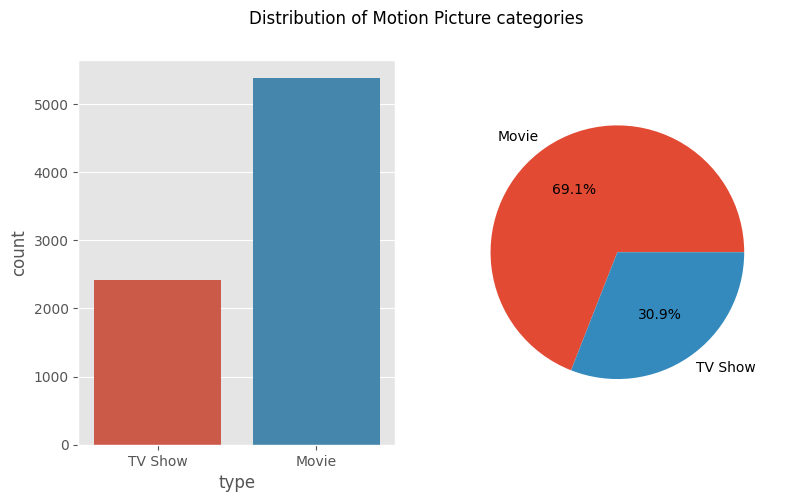

In [ ]:
# different types of items
fig,ax=plt.subplots(1,2,figsize=(9,5))
sns.countplot(x='type',data=df,ax=ax[0])
ax[1].pie(df['type'].value_counts(),labels=['Movie','TV Show'],autopct='%.1f%%')
fig.suptitle('Distribution of Motion Picture categories')
plt.show()

##### 1. Why did you pick the specific chart?

We wanted to see the distribution of movies and TV shows in the dataset.

##### 2. What is/are the insight(s) found from the chart?

We see that more movies than TV shows in our dataset, around 69% of the items are movies while 31% items are TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Top Directors

In [ ]:
tv_directors=df[df['type']=='TV Show']['director'].value_counts(ascending=False)
movie_directors=df[df['type']=='Movie']['director'].value_counts(ascending=False)

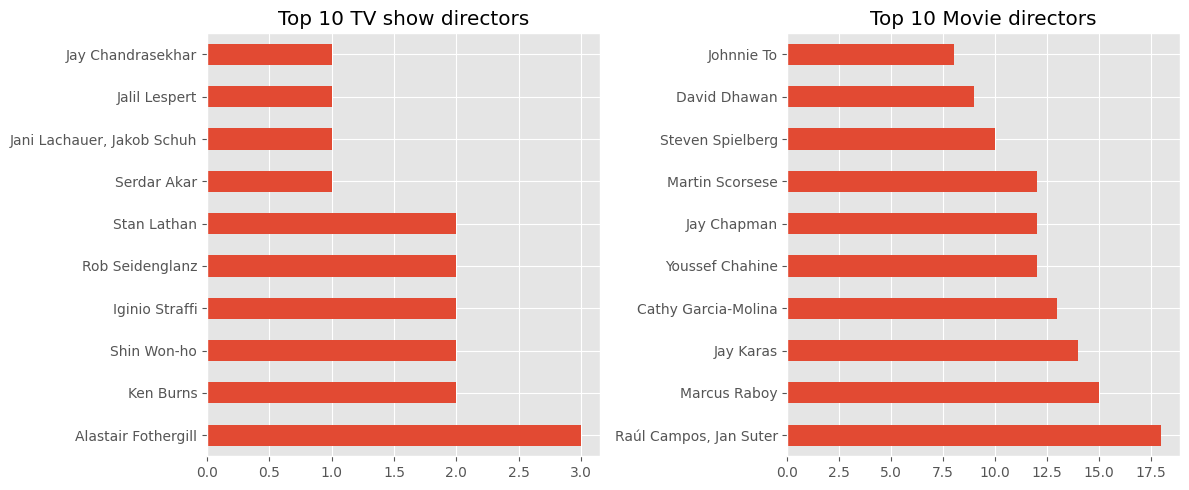

In [ ]:
# visualizing top 10 directors
fig,ax=plt.subplots(1,2,figsize=(12,5))
tv_directors[:10].plot(kind='barh',ax=ax[0])
ax[0].set_title("Top 10 TV show directors")
movie_directors[:10].plot(kind='barh',ax=ax[1])
plt.tight_layout()
ax[1].set_title("Top 10 Movie directors")
plt.show()

##### 1. Why did you pick the specific chart?

We wanted to look into top 10 directors of both movies and TV show

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Top Casts

In [ ]:
# Chart - 3 visualization code
df['cast']

0       João Miguel, Bianca Comparato, Michel Gomes, R...
1       Demián Bichir, Héctor Bonilla, Oscar Serrano, ...
2       Tedd Chan, Stella Chung, Henley Hii, Lawrence ...
3       Elijah Wood, John C. Reilly, Jennifer Connelly...
4       Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...
                              ...                        
7782    Imad Creidi, Antoinette Turk, Elias Gergi, Car...
7783    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
7784                                              Nasty C
7785                           Adriano Zumbo, Rachel Khoo
7786                                                  NaN
Name: cast, Length: 7787, dtype: object

In [ ]:
# separating tv cast names
tv_cast_names=df[df['type']=='TV Show']['cast'].str.split(', ').explode().value_counts()

# separating movie cast names
movie_cast_names=df[df['type']=='Movie']['cast'].str.split(', ').explode().value_counts()


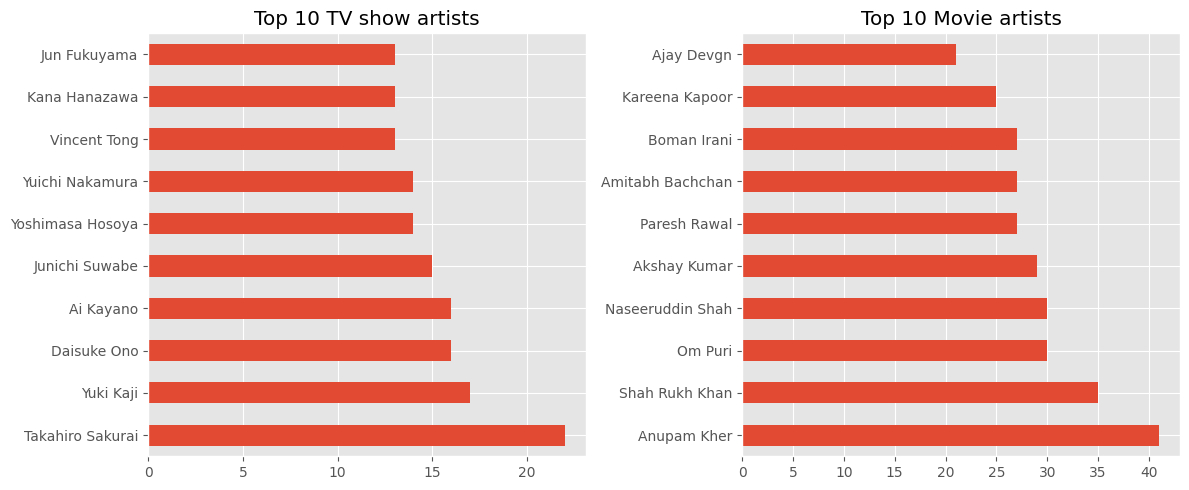

In [ ]:
# Visualizing top casts
fig,ax=plt.subplots(1,2,figsize=(12,5))
tv_cast_names[:10].plot(kind='barh',ax=ax[0])
ax[0].set_title("Top 10 TV show artists")
movie_cast_names[:10].plot(kind='barh',ax=ax[1])
plt.tight_layout()
ax[1].set_title("Top 10 Movie artists")
plt.show()

##### 1. Why did you pick the specific chart?

We wanted to look into top artists in both tv as well as movies

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Distribution of Pictures based on country

In [ ]:
country_counts=df['country'].str.split(", ").explode()
country_counts=country_counts.value_counts()
country_counts.rename(index={'United States':'United States of America'},inplace=True)

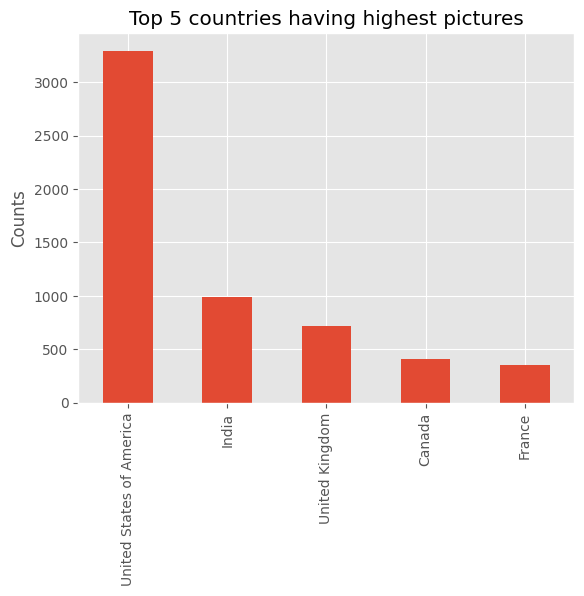

In [ ]:
# top 5 countries
country_counts[:5].plot(kind='bar')
plt.title("Top 5 countries having highest pictures")
plt.ylabel('Counts')
plt.show()

<ipython-input-27-0dda1c10eac0>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  worldmap=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


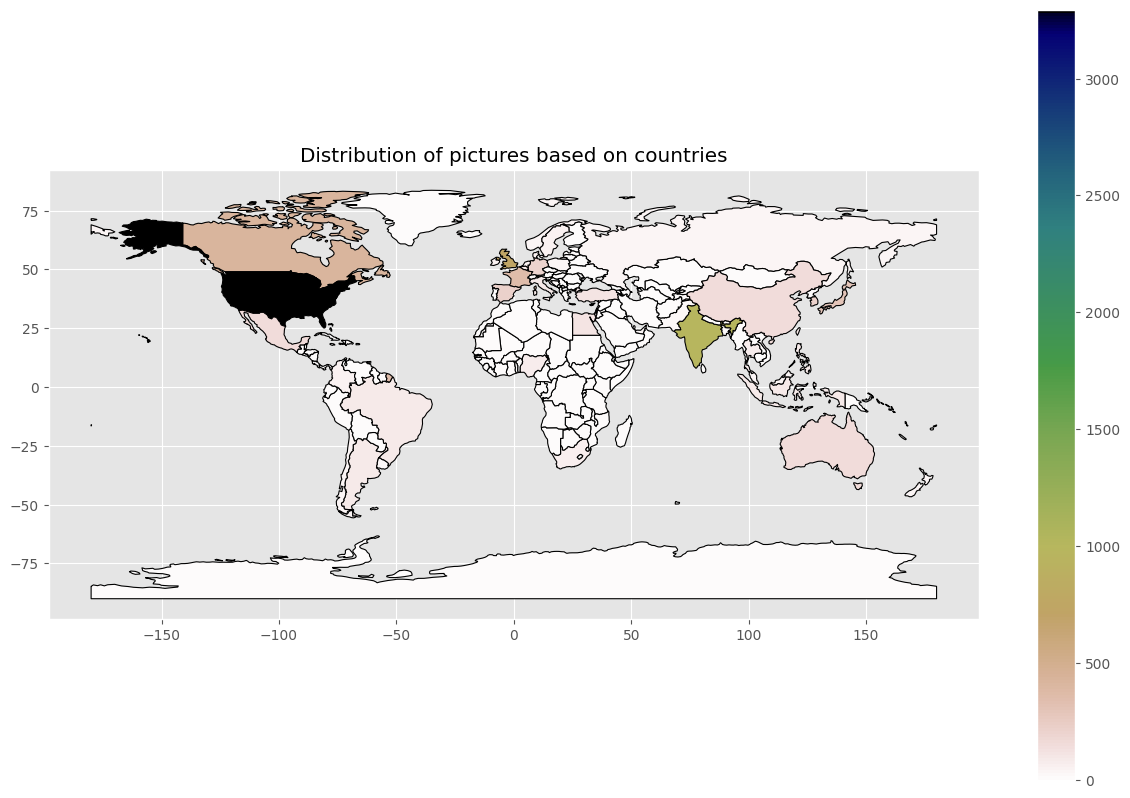

In [ ]:
# Visualizing the distribution using world map
worldmap=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged_data=pd.merge(worldmap,country_counts,left_on='name',right_index=True,how='left')
merged_data.rename(columns={'country':'counts'},inplace=True)
merged_data['counts']=merged_data['counts'].fillna(0)

# plotting
fig, ax = plt.subplots(figsize=(15, 10))
merged_data.plot(column='counts', linewidth=0.8,edgecolor='black',ax=ax,legend=True,cmap='gist_earth_r')
plt.title('Distribution of pictures based on countries')
plt.show()

##### 1. Why did you pick the specific chart?

We wanted to visualize distribution of movies/tv shows across various countries.

##### 2. What is/are the insight(s) found from the chart?

Most of the pictures in this dataset are american, there are few Indian pictures followed by England, Canada and France.

Answer Here

#### Analyzing Titles of the Picture

In [ ]:
df['title'].tail()

7782                                       Zozo
7783                                     Zubaan
7784                          Zulu Man in Japan
7785                      Zumbo's Just Desserts
7786    ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS
Name: title, dtype: object

In [ ]:
text=' '.join(title for title in df['title'] )
word_cloud=WordCloud(stopwords=STOPWORDS, background_color='white').generate(text)

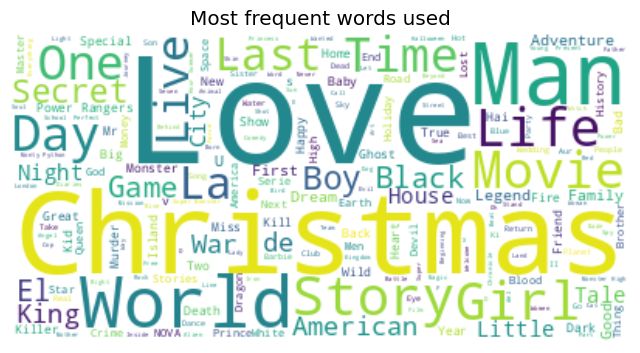

In [ ]:
# visualizing most frequent words
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis("off")
plt.title("Most frequent words used")
plt.show()

##### 1. Why did you pick the specific chart?

We wanted to see what are the frequent words used in the Movie/TV Show title for this dataset.

##### 2. What is/are the insight(s) found from the chart?

From the above plot we find that the most frequent words used in the dataset are Love, World, Christmas, Man etc. So we can expect that movies are based on Love, Christmas and so on.

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December,2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November,2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,January,2020


#### Release year of the Picture

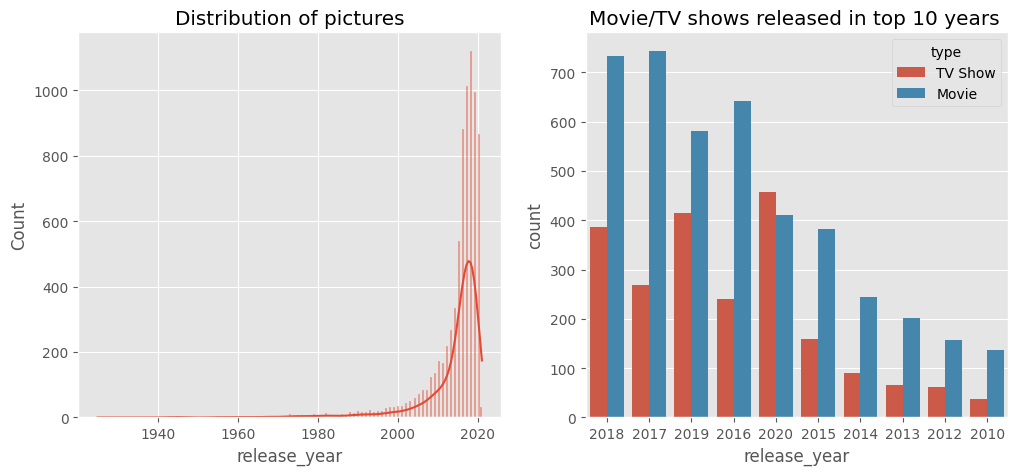

In [ ]:
# Distribution of pictures based on release year
fig, ax=plt.subplots(1,2,figsize=(12,5))
sns.histplot(df['release_year'],kde=True,ax=ax[0])
ax[0].set_title("Distribution of pictures")
sns.countplot(x='release_year',hue='type',order=df['release_year'].value_counts()[:10].index,data=df,ax=ax[1])
ax[1].set_title("Movie/TV shows released in top 10 years ")
plt.show()

##### 1. Why did you pick the specific chart?

We wanted to look into which all years movies does this dataset contains.

##### 2. What is/are the insight(s) found from the chart?

We find that this dataset primary contains movies which are released in the year 2018, 2017.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

###Ratings

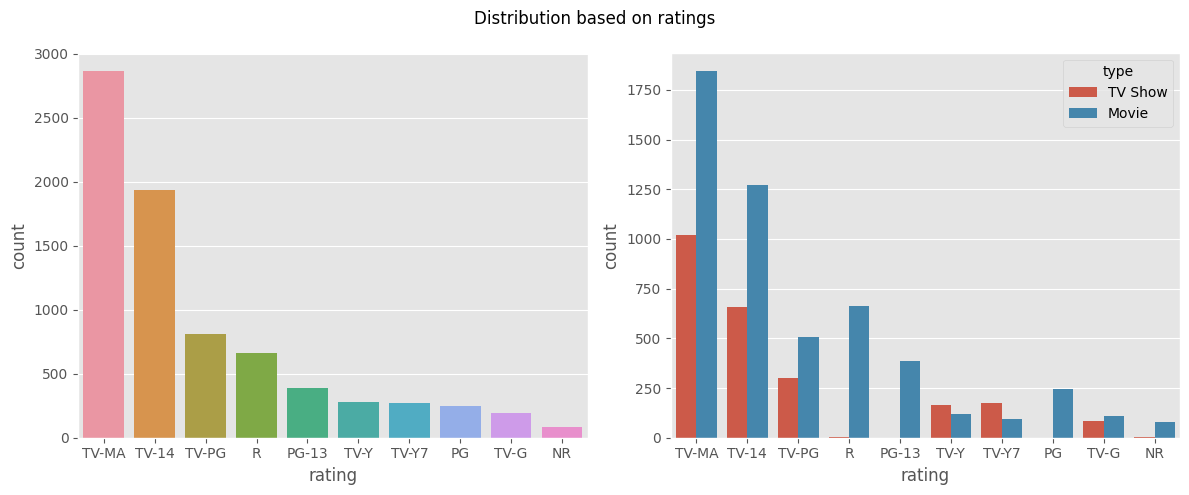

In [ ]:
# Distribution based on ratings

fig, ax=plt.subplots(1,2,figsize=(12,5))
sns.countplot(x='rating',data=df,ax=ax[0],order=df['rating'].value_counts().index[:10])
sns.countplot(x='rating',hue='type',order=df['rating'].value_counts().index[:10],data=df,ax=ax[1])
fig.suptitle("Distribution based on ratings")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

We wanted to see the rating distribution to our movies/tv shows in the dataset to understand for which audience this dataset belongs to.

##### 2. What is/are the insight(s) found from the chart?

From the above plot we see that most of the pictures have ratings like TV-MA, TV-14, TV-PG, which suggest that these shows are for mature audience, and very few picture are meant for the kids.

#### Movies/ TV show based on Generes.

In [ ]:
mov_genres=df.loc[df['type']=='Movie']['listed_in'].str.split(", ").explode()

tv_genres=df.loc[df['type']=='TV Show']['listed_in'].str.split(", ").explode()
tv_genres

0             International TV Shows
0                          TV Dramas
0                TV Sci-Fi & Fantasy
5             International TV Shows
5                          TV Dramas
                    ...             
7779          International TV Shows
7779       Spanish-Language TV Shows
7779    Stand-Up Comedy & Talk Shows
7785          International TV Shows
7785                      Reality TV
Name: listed_in, Length: 5525, dtype: object

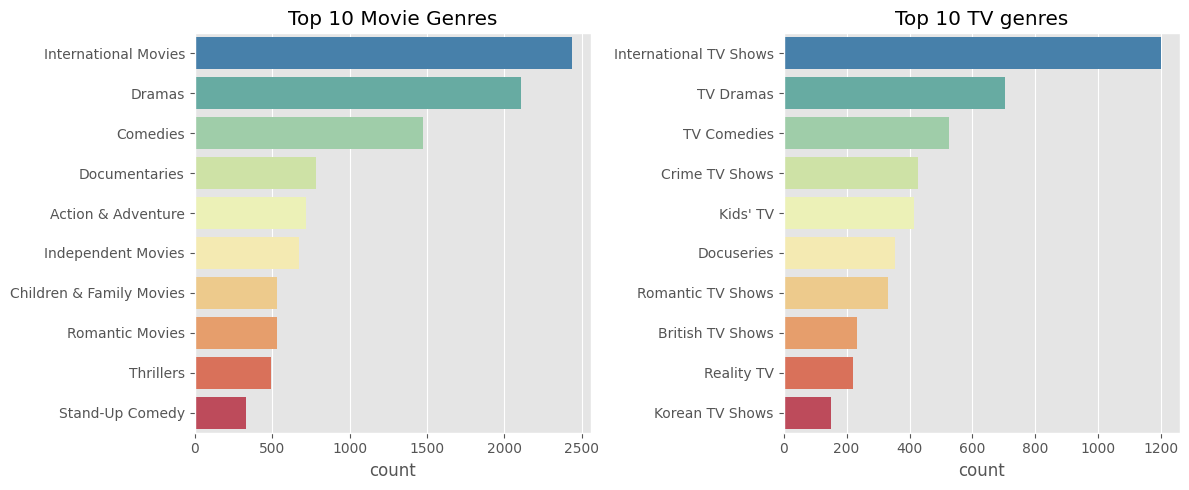

In [ ]:
# visualizing top genres for movie and tv shows
fig,ax=plt.subplots(1,2,figsize=(12,5))
sns.countplot(y=mov_genres,order=mov_genres.value_counts().index[:10],palette='Spectral_r',ax=ax[0])
ax[0].set_title("Top 10 Movie Genres")
ax[0].set_ylabel("")
sns.countplot(y=tv_genres,order=tv_genres.value_counts().index[:10],palette='Spectral_r',ax=ax[1])
ax[1].set_title("Top 10 TV genres")
ax[1].set_ylabel("")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

We wanted to see what are the top genres for Movies and TV shows that people prefer.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we find that people in genral like international movies and shows followed by drama and comedy.

#### Analyzing description

In [ ]:
text=' '.join(words for words in df['description'] )
word_cloud=WordCloud(stopwords=STOPWORDS, background_color='white').generate(text)

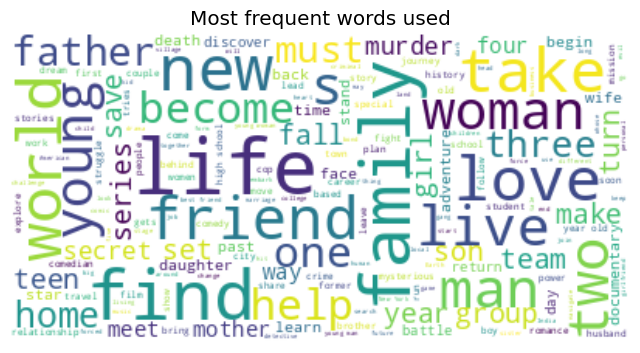

In [ ]:
# visualizing most frequent words

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis("off")
plt.title("Most frequent words used")
plt.show()

##### 1. Why did you pick the specific chart?

We wanted to see the most frequent used in the decription of a movie or tv show.

##### 2. What is/are the insight(s) found from the chart?

The most frequent words are family, friend, life, love, world  etc.

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
month_added       10
year_added        10
dtype: int64

We see lot of missing values in column director, cast, country.

In [ ]:
# handling missing values in director, cast, country
df[['director','cast','country']]=df[['director','cast','country']].fillna('unknown')

# dropping missing values in date_added release_year
df=df.dropna(subset=['date_added','rating'])

#### What all missing value imputation techniques have you used and why did you use those techniques?

We have replaced the missing value in director, cast, country as unknown and we have dropped the missing values in date_added and ratings.

### 2. Handling Outliers

In [ ]:
# let us look at our numerical columns
num_col=df.describe().columns
num_col


Index(['release_year', 'year_added'], dtype='object')

In [ ]:
df['year_added']

0       2020
1       2016
2       2018
3       2017
4       2020
        ... 
7782    2020
7783    2019
7784    2020
7785    2020
7786    2020
Name: year_added, Length: 7770, dtype: Int64

Text(0.5, 0.98, 'Outliers in numeric columns')

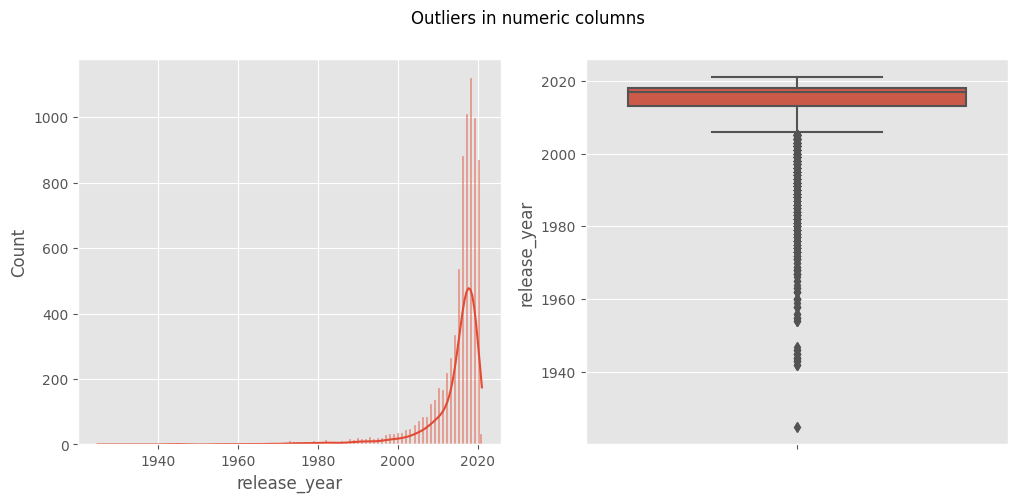

In [ ]:
# plotting these two numeric variables
fig,ax=plt.subplots(1,2,figsize=(12,5))
sns.histplot(df["release_year"],kde=True,ax=ax[0])
sns.boxplot(y=df['release_year'],ax=ax[1])
fig.suptitle("Outliers in numeric columns")


##### What all outlier treatment techniques have you used and why did you use those techniques?

Since there are only two numeric columns, rest are text data, and we won't need the numeric data for our clustering analysis, so we let the outliers be as it is.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***